In [1]:
import numpy as np
import hls4ml

2023-06-15 10:04:42.600407: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-15 10:04:45.818342: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-15 10:04:55.154914: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-15 10:04:55.169639: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-15 10:05:12.790768: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.layers import Activation

### Create a simple keras model consisting of one layer (GELU)

In [4]:
input_ = tf.keras.Input(shape=(5,))
#output = tf.keras.activations.gelu(input_)
output = Activation(activation='gelu', name='gelu1')(input_)
model = tf.keras.Model(input_, output, name='gelu_test')
model.summary()

2023-06-15 10:05:58.593469: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "gelu_test"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 gelu1 (Activation)          (None, 5)                 0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [5]:
type(input_), type(output), type(model)

(keras.engine.keras_tensor.KerasTensor,
 keras.engine.keras_tensor.KerasTensor,
 keras.engine.functional.Functional)

### Create the hls4ml equivalent

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 5]], output shape: [None, 5]
Layer name: gelu1, layer type: Activation, input shapes: [[None, 5]], output shape: [None, 5]
Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 5]], output shape: [None, 5]
Layer name: gelu1, layer type: Activation, input shapes: [[None, 5]], output shape: [None, 5]
Creating HLS model


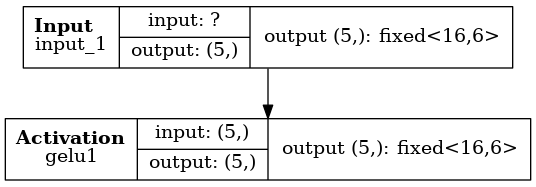

In [6]:
config = hls4ml.utils.config_from_keras_model(model, granularity='name')
hls_model = hls4ml.converters.convert_from_keras_model(
    model, hls_config=config, output_dir='dummy', part='xcu250-figd2104-2L-e'
)
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

### Implement `gelu` as a member of `nnet`

In [7]:
hls_model.compile()

Writing HLS project
Done


### Make our test first

In [8]:
x = np.array([-3.0, -1.0, 0.0, 1.0, 3.0])

In [9]:
y_hls = hls_model.predict(x)

In [10]:
y_keras = model.predict(x).flatten()

1/1 [==============================] - 3s 3s/step


In [11]:
y_hls == y_keras

array([False, False,  True, False, False])

In [12]:
y_hls

array([0., 0., 0., 0., 0.])

In [13]:
y_keras

array([-0.00404951, -0.15865529,  0.        ,  0.8413447 ,  2.9959507 ],
      dtype=float32)